In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

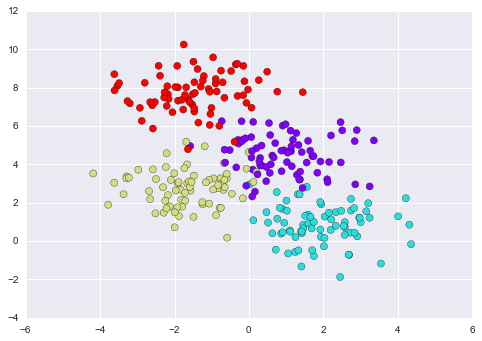

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [3]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                          levels=np.arange(n_classes + 1) - 0.5,
                          cmap=cmap, clim=(y.min(), y.max()),
                          zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

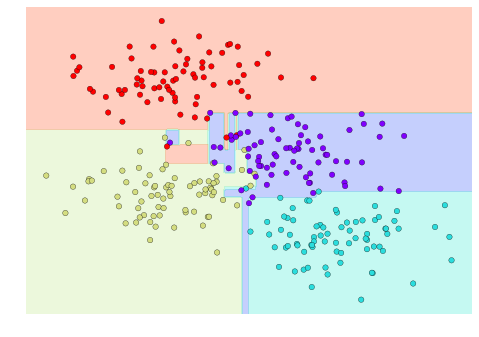

In [4]:
from sklearn.tree import DecisionTreeClassifier
visualize_classifier(DecisionTreeClassifier(), X, y)

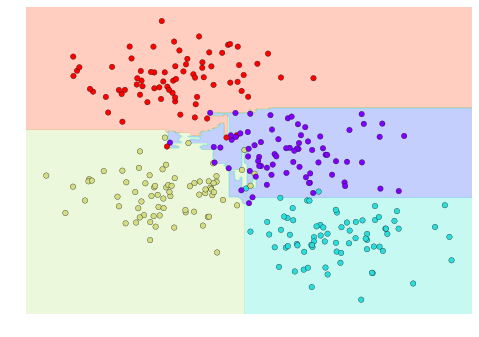

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
visualize_classifier(bag, X, y)

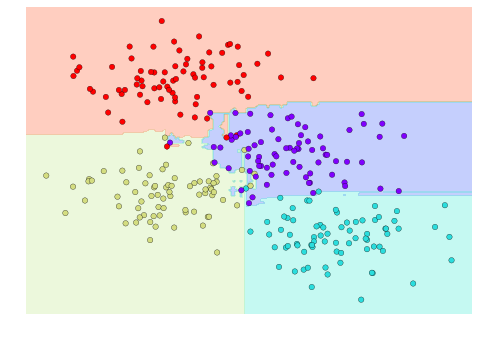

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

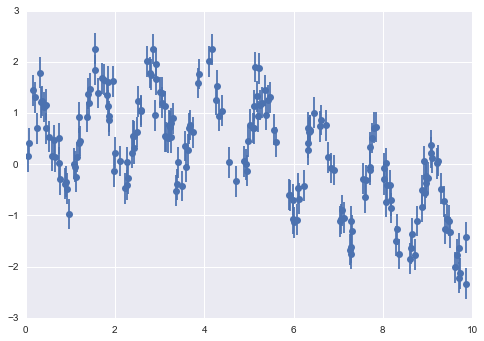

In [8]:
def model(x, sigma=0.3): 
    fast_oscillation = np.sin(5 * x) 
    slow_oscillation = np.sin(0.5 * x) 
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise


rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

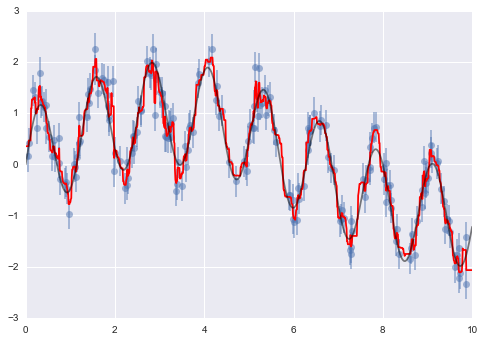

In [10]:
from sklearn.ensemble import RandomForestRegressor 
forest = RandomForestRegressor(200) 
forest.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, np.newaxis])
ytrue = model(xfit, sigma=0)
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

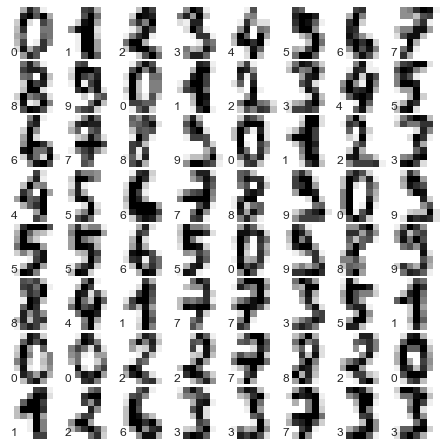

In [20]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x1, x2, y1, y2 = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(100).fit(x1, y1)
yp = model.predict(x2)
print classification_report(y2, yp)

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        37
          1       0.96      1.00      0.98        43
          2       1.00      0.95      0.98        44
          3       0.98      0.98      0.98        45
          4       1.00      0.95      0.97        38
          5       0.94      0.98      0.96        48
          6       1.00      1.00      1.00        52
          7       0.96      1.00      0.98        48
          8       0.98      0.94      0.96        48
          9       0.98      0.96      0.97        47

avg / total       0.98      0.98      0.98       450



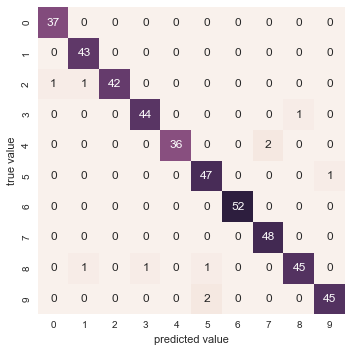

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y2, yp)
sns.heatmap(mat, annot=True, square=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')